Zoher Ghadyali

SigSys 2015

Problem Set 10

Problems 3 and 4

In [1]:
%matplotlib inline
%run convenience.ipynb
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

np.set_printoptions(precision=2,suppress=True) # numpy output options

pi=np.pi
j=1j

PROBLEM 3 PART A

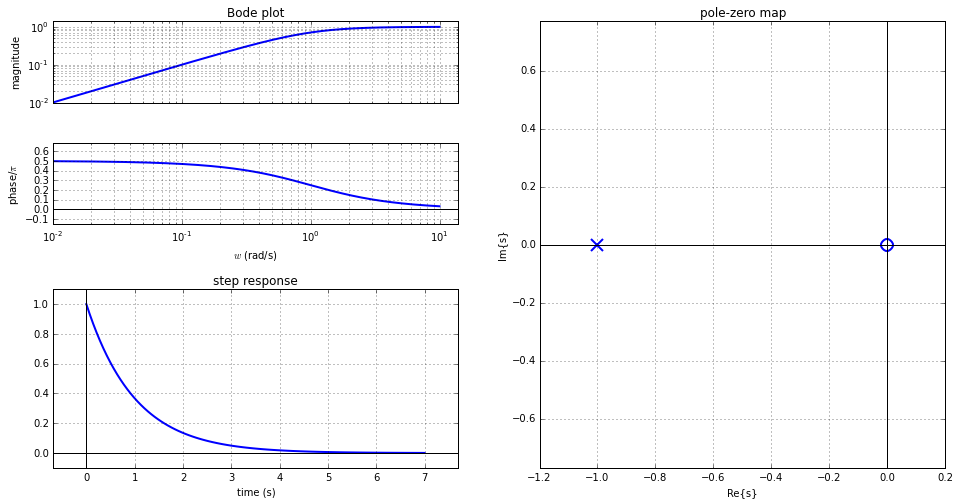

In [22]:
sys = signal.lti([1, 0], [1,1])
t=np.linspace(0,300,1000)
_t,s=signal.step(sys,T=t)
combinedplot(sys)

This system is a first-order system that has 2 points on the s-plane, a pole and a zero, none of which have imaginary components. The step response exponentially approaches 0. This system appears to act as a high-pass filter that attenuates lower frequencies and allows higher frequencies to pass.

PROBLEM 3 PART B

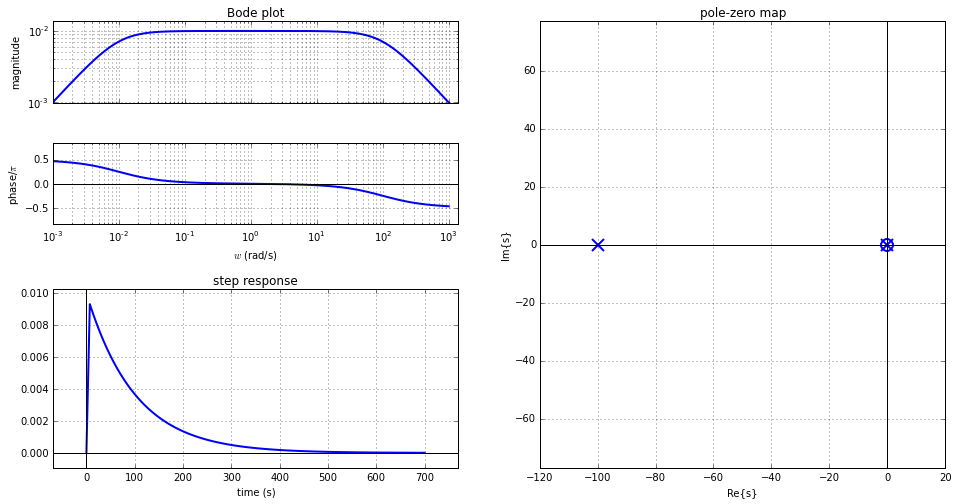

In [3]:
sys = signal.lti([1, 0], [1,100, 1])
t=np.linspace(0,300,1000)
_t,s=signal.step(sys,T=t)
combinedplot(sys)

This is a second-order system that has 3 points on the s-plane, two poles and a zero. This system also exponentially decays to 0 as time passe and appears to be a band-pass filter that allows frequencies in a certain range to pass and attenuates frequencies outside of this range.

PROBLEM 3 PART C

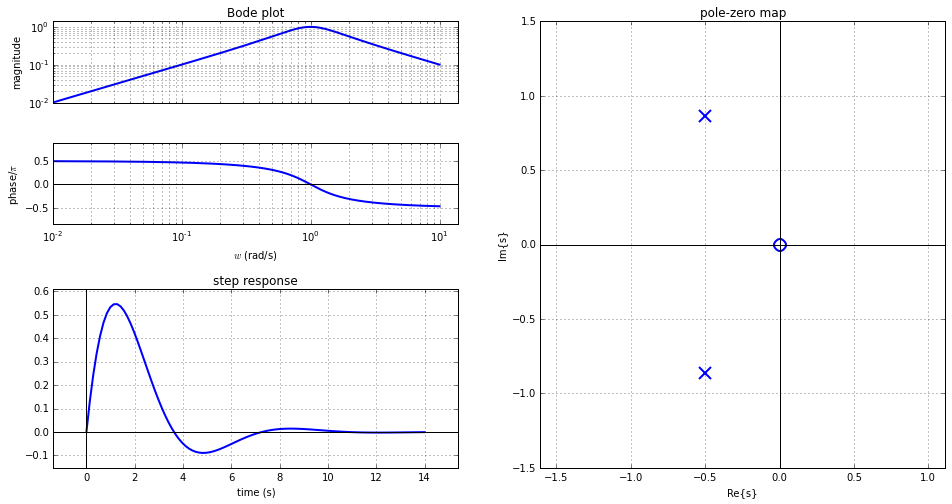

In [4]:
sys = signal.lti([1, 0], [1, 1, 1])
t=np.linspace(0,300,1000)
_t,s=signal.step(sys,T=t)
combinedplot(sys)

This is a second order of system that has two poles and a zero on the s-plane. This system doesn't attenuate a very narrow range of frequencies, maybe even a single frequency. This system does have some oscilation in the step response but does approach 0 in time. We are beginning to see some instability in the system.

PROBLEM 3 PART D

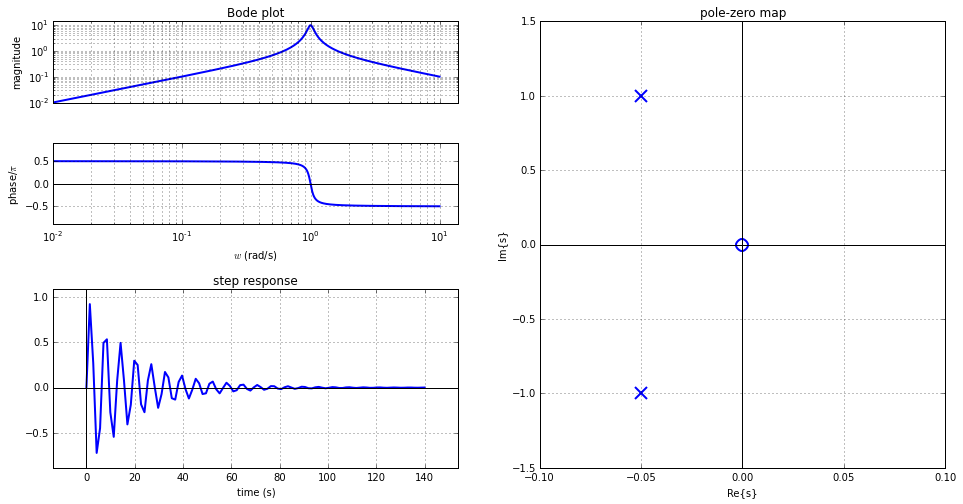

In [5]:
sys = signal.lti([1, 0], [1, 0.1, 1])
t=np.linspace(0,300,1000)
_t,s=signal.step(sys,T=t)
combinedplot(sys, axis=[-0.1, 0.1, -1.5, 1.5])

This second order system has two poles and one zero. Like above, this system attenuates every frequency except for a single frequency. The system's step response does contain oscillations but with less and less amplitude as time goes on, eventually approaching 0. The difference between this system and the previous one is simply the scaling of the s-term in the denominator but decreasing this term has led to several more oscillations in the system.

PROBLEM 3 PART E

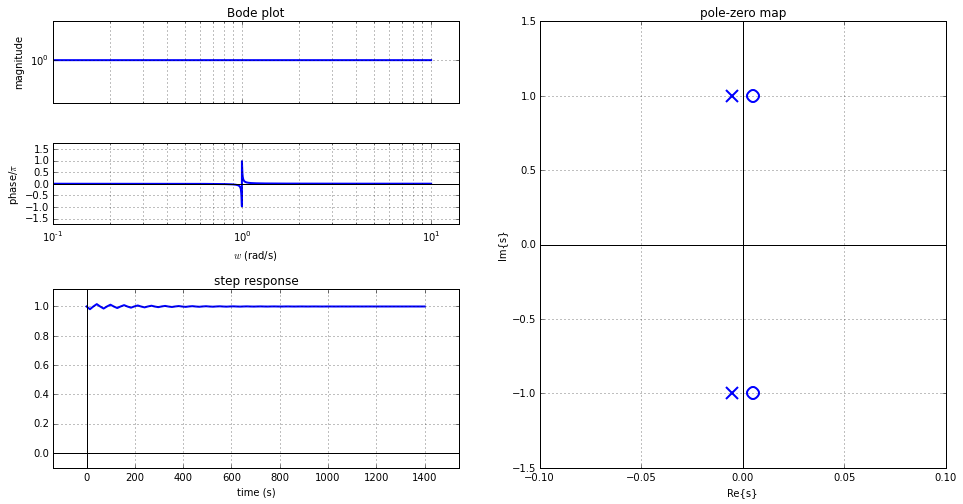

In [6]:
sys = signal.lti([1, -0.01, 1], [1, 0.01, 1])
t=np.linspace(0,300,1000)
_t,s=signal.step(sys,T=t)
combinedplot(sys, axis=[-0.1, 0.1, -1.5, 1.5])

This second order system now has polynomials in both the numerator and the denominator and so, produces 4 points on the s-plane. There are two holes and two zeros. This system allows all frequencies to pass and alters the phase. The step response oscillates slightly but remains at 1.

PROBLEM 3 PART F

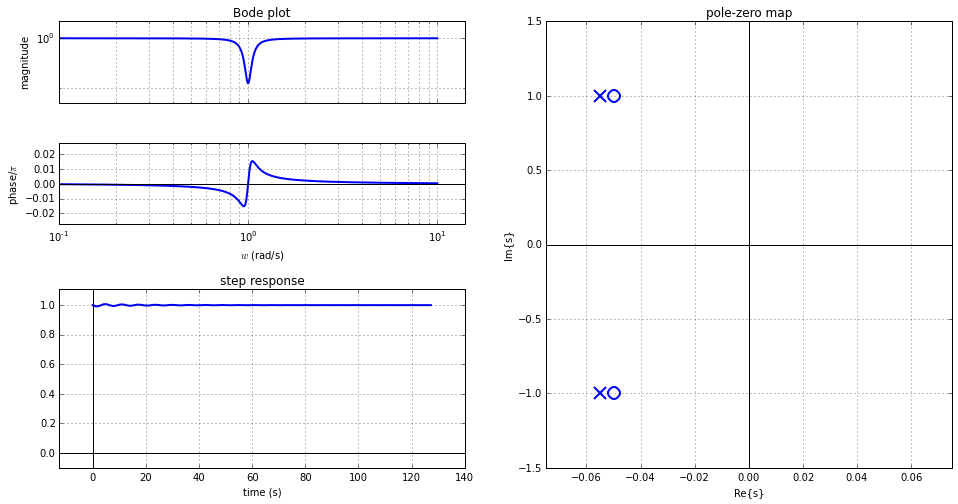

In [7]:
sys = signal.lti([1, 0.1, 1], [1, 0.11, 1])
t=np.linspace(0,300,1000)
_t,s=signal.step(sys,T=t)
combinedplot(sys, axis=[-0.075, 0.075, -1.5, 1.5])

This second-order system again has 2 poles and 2 zeroes. The system acts as a notch filter that attenuates a single frequency, allowing the rest to pass. The step response is the same as the previous system, with less oscillation initially and then the system settles to 1.

PROBLEM 4 PART A

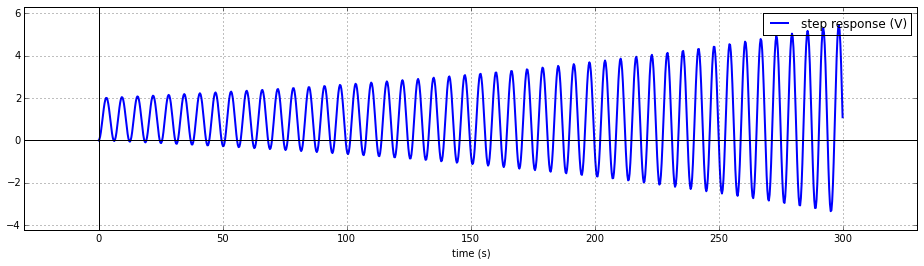

In [8]:
sys = signal.lti([1], [1, -0.01, 1])
t=np.linspace(0,300,1000)
_t,s=signal.step(sys,T=t)
timeplot(t,s,label='step response (V)')

Above is the step response of the initial system, without any forms of control implemented. THe system is oscillating as time goes on and the amplitudes of the oscillations are increasing with time.

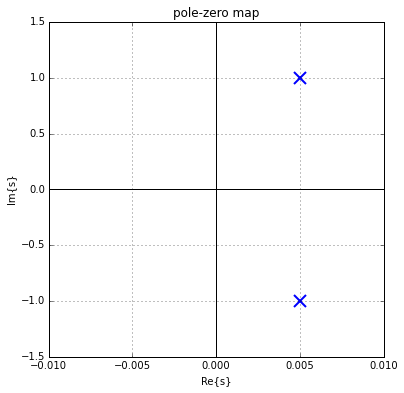

In [9]:
pzmap(sys,axis=[-.01,.01,-1.5,1.5])

Above is the pole-zero map of this system, again without implementing any control. This system contains two poles.

PROBLEM 4 PART B

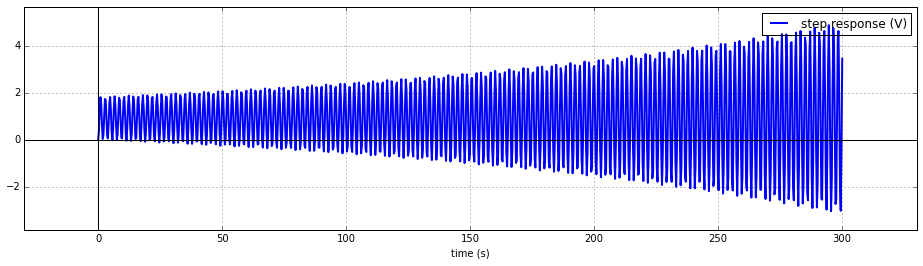

In [10]:
K = 10
sys = signal.lti([K], [1,-.01,1+K])
t=np.linspace(0,300,1000)
_t,s=signal.step(sys,T=t)
timeplot(t,s,label='step response (V)')

Above is the step response using proportional control on the system. Using a feedback gain of 10, the oscillations have increased in frequency without changing the amplitude. The amplitude of the oscillations still increases with time. This gain does not stabilize the system.

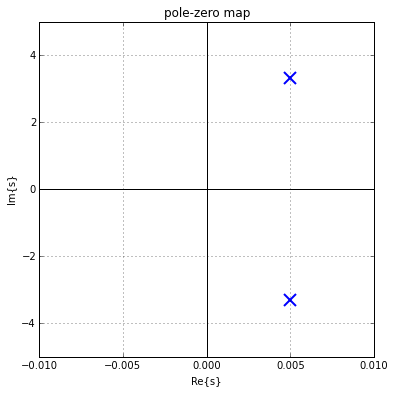

In [11]:
pzmap(sys,axis=[-.01,.01,-5,5])

Implementing proportional control with a feedback gain of 10 has not changed the re{s} but has scaled up the imaginary components of the two poles. This change reflects the increase in the frequency of the oscillations.

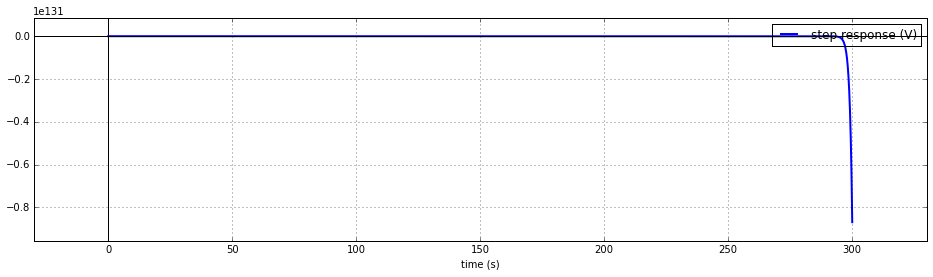

In [12]:
K = -2
sys = signal.lti([K], [1,-.01,1+K])
t=np.linspace(0,300,1000)
_t,s=signal.step(sys,T=t)
timeplot(t,s,label='step response (V)')

I tried another feedback gain that was negative just to see the effect of this system. Any positive feedback gains on this system just continued to produce oscillations and decreasing the K parameter to something close to 0 just returns us to the original behavior of the system. With this negative feedback gain, the system no longer oscillates but instead rapidly grows, approaching negative infinity.

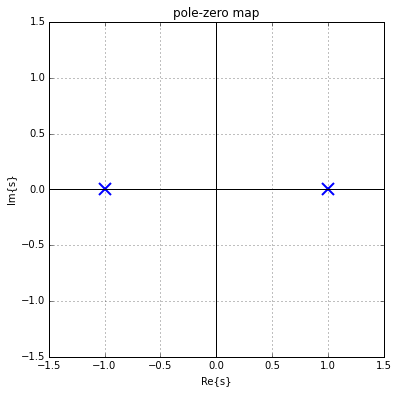

In [13]:
pzmap(sys)

The pole-zero map now looks very different, with two poles on the re{s} axis, with no imaginary components. The pole on the right dominates this system. I was not able to stabilize the system using proportional control. 

PROBLEM 4 PART C

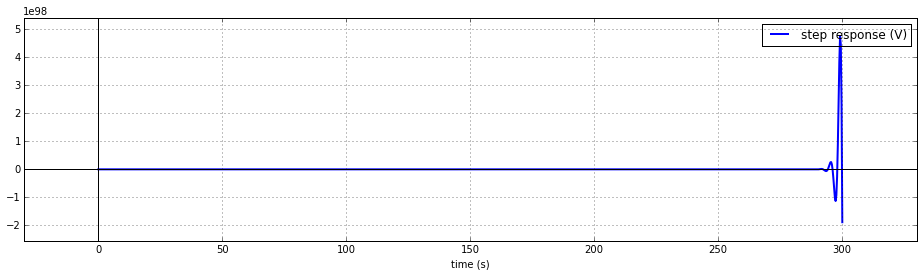

In [14]:
K = 5
sys = signal.lti([K], [1,-0.01,1,K])
t=np.linspace(0,300,1000)
_t,s=signal.step(sys,T=t)
timeplot(t,s,label='step response (V)')

Using integral control and a feedback gain of 5, the system still demonstrates oscillations in the step response. The amplitudes of these oscillations grows very rapidly as the feedback gain is increased. With this feedback gain, integral control still does not stabilize the system.

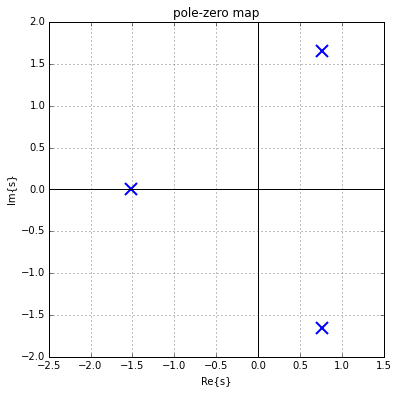

In [15]:
pzmap(sys)

This pole-zero map has 3 poles, with the ones on the right of the imaginary axis dominating the behavior of this system. The system oscillates rapidly right at the end of the step-response.

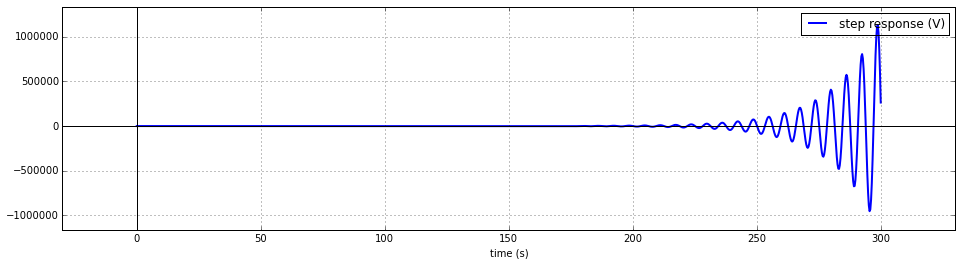

In [16]:
K = 0.1
sys = signal.lti([K], [1,-0.01,1,K])
t=np.linspace(0,300,1000)
_t,s=signal.step(sys,T=t)
timeplot(t,s,label='step response (V)')

The second feedback gain that I tried drastically reduced the feedback gain of integral control. This feedback gain led to several oscillations as time goes on, again with increasing amplitude. Again, I was not able to stabilize the system with integral control.

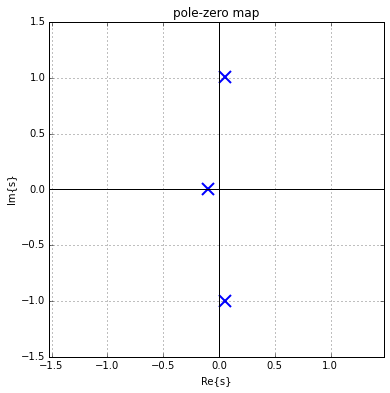

In [17]:
pzmap(sys)

Interestingly enough, this pole-zero map has the three poles much closer together than the previous feedback gain. As the feedback gain approaches 0, the three poles appear to be convering to the same real value of s while at different points on the imaginary axis.

PROBLEM 4 PART D

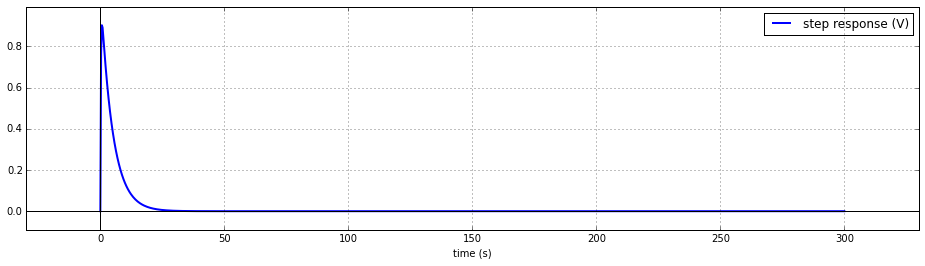

In [18]:
K = 5
sys = signal.lti([K, 0], [1, -0.01+K, 1])
t=np.linspace(0,300,1000)
_t,s=signal.step(sys,T=t)
timeplot(t,s,label='step response (V)')

Using derivative control with a feedback gain of 5, I was finally able to stabilize the system, which exponentially decays to 0.

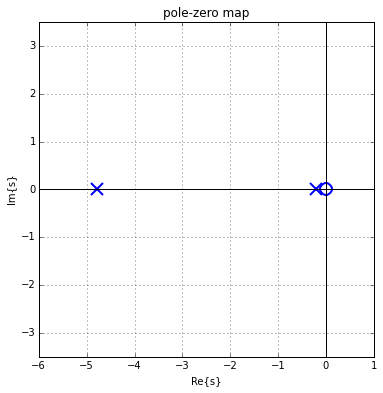

In [19]:
pzmap(sys)

This pole-zero map has two poles and one zero, none of which contain any imaginary components. This lack of imaginary components explains the fact there are no oscillations in the step response. The right-most pole again dominates the behavior so we don't need to look at the pole on the left.

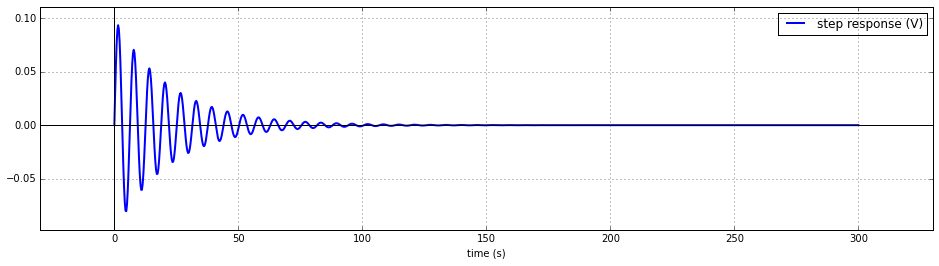

In [20]:
K = 0.1
sys = signal.lti([K, 0], [1, -0.01+K, 1])
t=np.linspace(0,300,1000)
_t,s=signal.step(sys,T=t)
timeplot(t,s,label='step response (V)')

For my second feedback gain, I tried a value much smaller so that there is very little derivative control in the system. As expected, the system oscillates a lot but the amplitudes of the oscillations decay until the system stabilizes and the step response is at 0.

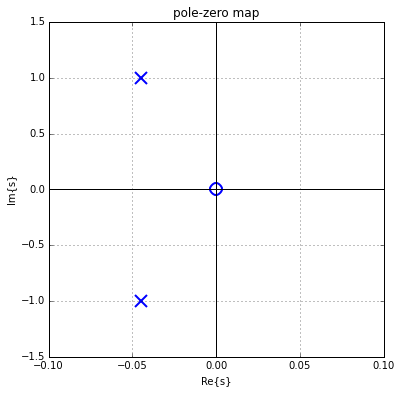

In [21]:
pzmap(sys, axis=[-0.1, 0.1, -1.5, 1.5])

This pole-zero map has two poles which have imaginary components and a zero. The imaginary components here and the oscillations do look similar to the integral control implemented in Part C.